In [1]:
from timeit import default_timer as timer
import os
import SimEx
from SimEx import *

initializing ocelot...



# Data path setup

In [2]:
data_path = '../../data/simulation/'
prop_path = 'prop/prop_out_9fs_5keV_from_CHY.h5'
os.chdir(data_path)
os.getcwd()

'/gpfs/exfel/data/user/juncheng/crystalProject/data/simulation'

# Wave propogration 

In [3]:
prop_analysis=XFELPhotonAnalysis(input_path=prop_path)


 Start initialization.

 Loading wavefront from prop/prop_out_9fs_5keV_from_CHY.h5.
 ... done.

 Getting intensities.
 ... done.
 Data dimensions =  (150, 150, 651)

 Masking NANs.
 ... done.



 Plotting total power.

 Switching to frequency domain.


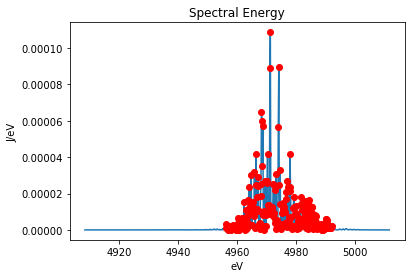

In [4]:
prop_analysis.plotTotalPower(spectrum=True)


 Plotting total power.
Pulse energy 0.00037 J


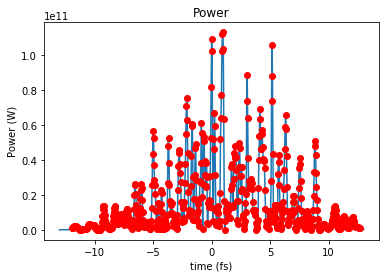

In [5]:
prop_analysis.plotTotalPower()


 Plotting intensity map.
R-space


<Figure size 432x288 with 0 Axes>

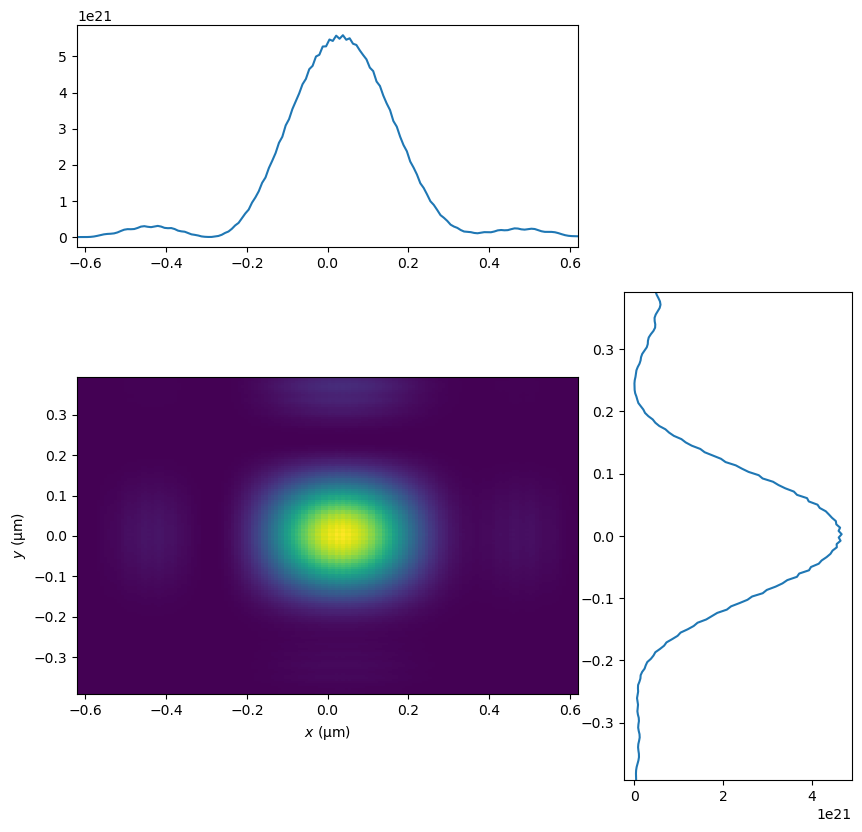

In [6]:
prop_analysis.plotIntensityMap()

In [7]:
import h5py
with h5py.File(prop_path, 'r') as f:
    grp = f['misc']
    print(grp.keys())
    print (grp['xFWHM'][...]*1e6)
    print (grp['yFWHM'][...]*1e6)

<KeysViewHDF5 ['electricField', 'resizing', 'spectrum0', 'spectrum1', 'xFWHM', 'yFWHM']>
0.281413778420212
0.21974034917555946


# Photon-matter interaction (form factor calculation)

Lysozyme sample from [Sugahara Nmethods 2015](https://www.nature.com/articles/nmeth.3172), [PDB File](https://www.rcsb.org/structure/3WUL)

In [8]:
pmi_parameters={"number_of_trajectories" : 1,
                "random_rotation" : False}
photon_matter_interactor=XMDYNDemoPhotonMatterInteractor(parameters=pmi_parameters,
                                                         input_path=prop_path,
                                                         output_path='pmi',
                                                         sample_path='3WUL.pdb')

In [9]:
photon_matter_interactor.backengine()
photon_matter_interactor.saveH5()

Previous module:  prop
  NOT: data
  NOT: history
info
misc
params
version
['arrEhor', 'arrEver']
[('arrEhor', <HDF5 dataset "arrEhor": shape (150, 150, 651, 2), type "<f4">), ('arrEver', <HDF5 dataset "arrEver": shape (150, 150, 651, 2), type "<f4">)]


# Scattering

## Configure Detector geometry

In [10]:
panel = DetectorPanel(ranges={"fast_scan_min" : 0, "fast_scan_max" : 100,
                              "slow_scan_min" : 0, "slow_scan_max" : 100},
                      pixel_size=6*220.0e-6*meter,
                      energy_response=1.0/electronvolt,
                      distance_from_interaction_plane=0.13*meter,
                      corners={"x" : -49, "y": -49},
                      saturation_adu=1.e6,
                      )

In [11]:
detector_geometry = DetectorGeometry(panels=panel,)

# Configure the Diffractor Parameters

In [19]:
diffraction_parameters = SingFELPhotonDiffractorParameters(
                                               uniform_rotation=False,
                                               slice_interval=100,
                                               number_of_slices=100,
                                               number_of_diffraction_patterns=1,
                                               detector_geometry=detector_geometry,
                                               forced_mpi_command='mpirun -np 1',
                                              )

In [20]:
diffractor = SingFELPhotonDiffractor(parameters=diffraction_parameters,
                                     input_path='pmi',
                                     output_path="diffr")

In [21]:
diffractor.backengine()

255

In [15]:
diffractor.saveH5()

In [16]:
spi_analysis = DiffractionAnalysis(diffractor.output_path,
                                   pattern_indices=[1],
                                   poissonize=False)

In [ ]:
spi_analysis.plotPattern(logscale=True)